# 4. Final joint modelling of the TESS, MuSCAT2, and LCOGT photometry
## 4.1 With LDTk

Here we carry out the final joint analysis of all the photometry with LDTk-based constraints on the stellar limb darkening. The `TMLPF` log posterior function combines the functionality of the `TESSLPF`, `M2LPF`, and `LCOLPF`.  all the previous LPFs. The number of free parameters is quite large, but still ok. I tried some more sophisticated approaches, such as using Gaussian Processes, but the results weren't affected in any significant way.

Since the per-dataset parametrisation is the same, we could just read in the linear model coefficients from the indepentent analyses to skip over the global optimisation.

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import seaborn as sb
from corner import corner
from tqdm.auto import tqdm
from ldtk import tess, sdss_g, sdss_r, sdss_i, sdss_z

In [7]:
%run src/core.py
%run src/tmlpf.py

In [8]:
lpf = TMLPF('toi_263_tess_m2_lco_ldtk_errors', use_ldtk=True)

In [20]:
wns = [log10(diff(f).std()/sqrt(2)) for f in lpf.fluxes]
for i,p in enumerate(lpf.ps[lpf._sl_err]):
    p.prior = NP(wns[i], 0.1)

### Global optimisation

Now is a good moment to go make yourself a good cup of coffee (tea, hot chocolate, caipirinha, etc...)

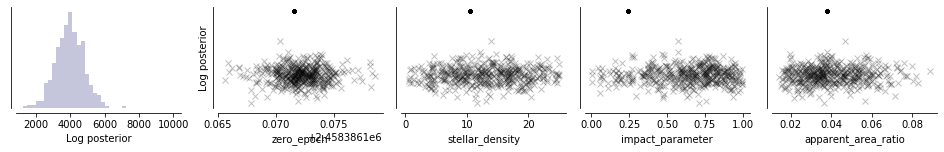

In [24]:
lpf.optimize_global(niter=8000, npop=500)

(0.94, 1.025)

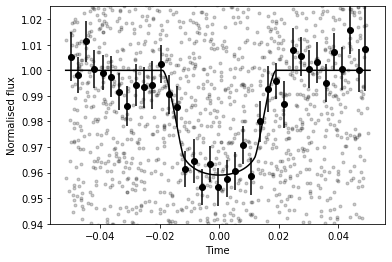

In [25]:
lpf.plot_folded_tess_transit();
ylim(0.94,1.025)

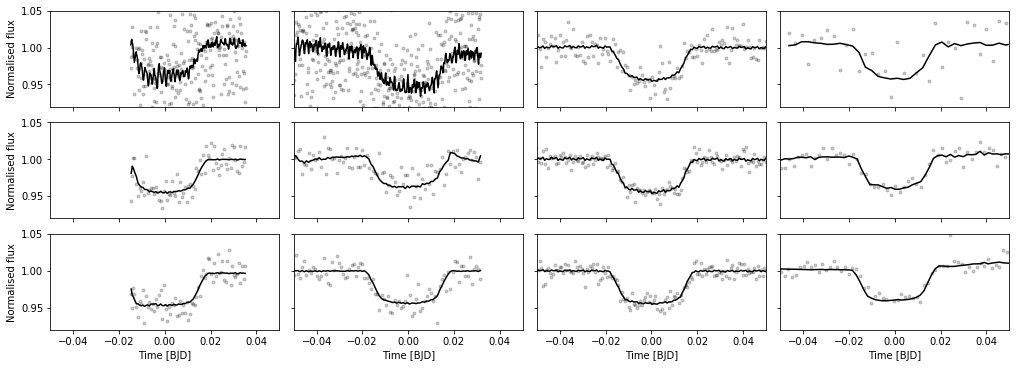

In [26]:
fig = lpf.plot_m2_transits();
setp(fig.axes, xlim=(-0.05,0.05));

In [27]:
lpf.sample_mcmc(5000, thin=100, repeats=5, save=True)

In [29]:
lpf.sample_mcmc(10000, thin=100, repeats=5, save=True)

In [ ]:
lpf.plot_m2_transits()

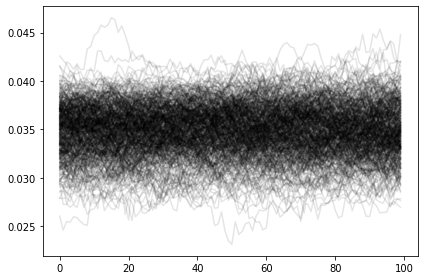

In [21]:
lpf.plot_mcmc_chains(8);

In [11]:
df = lpf.posterior_samples(derived_parameters=False)

In [ ]:
corner(df.iloc[:,2:]);

In [ ]:
hist(sqrt(df.k2_app_tess));

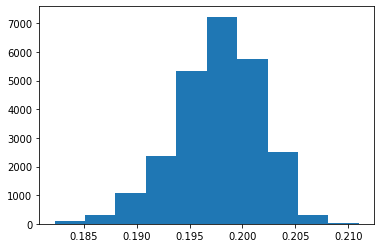

In [144]:
hist(sqrt(df.k2_app));

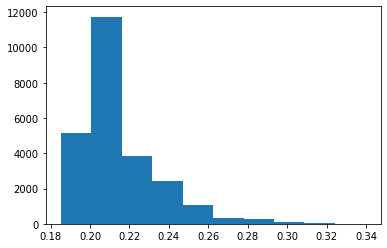

In [145]:
hist(sqrt(df.k2_true));

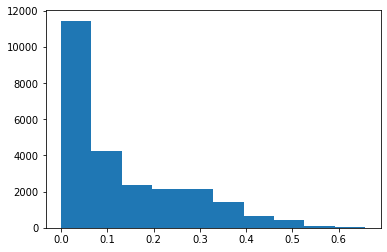

In [146]:
hist(1 - df.k2_app / df.k2_true);

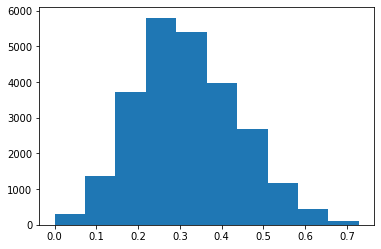

In [147]:
hist(1 - df.k2_app_tess / df.k2_true);